In [0]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import sys

from sklearn import (
    linear_model, metrics, neural_network, pipeline, preprocessing, model_selection
)

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_row', 1000)

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=129JPWF6XDifE8NiMlZZDrpP9d7hp3_KR'

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

129JPWF6XDifE8NiMlZZDrpP9d7hp3_KR


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('UCF_TLDClustering.txt')  
data = pd.read_csv('UCF_TLDClustering.txt', sep="\|\|", engine='python')

In [0]:
data.columns = ["StoreID", "StoreGroup", "PeriodID", "TicketID", "ItemName", "ItemCategory", "Qty", "Sales", "Modifier"]

In [0]:
data.head()

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
0,1{,}A{,}20180801{,}1{,}Chevy Ajax{,}Automobile{,}1{,}499{,}0
1,1{,}A{,}20180801{,}2{,}Chevy Spark{,}Automobile{,}1{,}499{,}0
2,1{,}A{,}20180801{,}3{,}Chevy Colorado{,}Automobile{,}1{,}799{,}0
3,1{,}A{,}20180801{,}3{,}Chevy Gemini{,}Automobile{,}1{,}679{,}0
4,1{,}A{,}20180801{,}3{,}WND{,}Phones{,}2{,}0{,}1


In [0]:
data.describe()

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
count,12811321,12811321,12811321,12811321,12811321,12811321,12811321,12811321,12811321
unique,90,7,365,498,397,7,91,1203,2
top,202{,}F{,}20190302{,}32{,}Apple{,}Automobile{,}1{,}0{,}0
freq,298687,2053989,54210,100581,1313144,5724853,10850445,1851939,10959386


In [0]:
df = pd.DataFrame(data) 

Cleaning data - removal of '{' and '}'

In [0]:
df = df.applymap(lambda x: x.replace('{', ''))

In [0]:
df = df.applymap(lambda x: x.replace('}', ''))

In [0]:
df.head()

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
0,1,A,20180801,1,Chevy Ajax,Automobile,1,499,0
1,1,A,20180801,2,Chevy Spark,Automobile,1,499,0
2,1,A,20180801,3,Chevy Colorado,Automobile,1,799,0
3,1,A,20180801,3,Chevy Gemini,Automobile,1,679,0
4,1,A,20180801,3,WND,Phones,2,0,1


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811321 entries, 0 to 12811320
Data columns (total 9 columns):
StoreID         object
StoreGroup      object
PeriodID        object
TicketID        object
ItemName        object
ItemCategory    object
Qty             object
Sales           object
Modifier        object
dtypes: object(9)
memory usage: 879.7+ MB


In [0]:
df.loc[df.isna().any(axis=1),:]

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier


In [0]:
df.describe(include='all')

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
count,12811321,12811321,12811321,12811321,12811321,12811321,12811321,12811321,12811321
unique,90,7,365,498,397,7,91,1203,2
top,202,F,20190302,32,Apple,Automobile,1,0,0
freq,298687,2053989,54210,100581,1313144,5724853,10850445,1851939,10959386


In [0]:
df.StoreGroup.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

![alt text](https://)Filtering data with StoreID value as 1

In [0]:
df1 = df[df.StoreID =='1']

In [0]:
df1.head(10)

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
0,1,A,20180801,1,Chevy Ajax,Automobile,1,499,0
1,1,A,20180801,2,Chevy Spark,Automobile,1,499,0
2,1,A,20180801,3,Chevy Colorado,Automobile,1,799,0
3,1,A,20180801,3,Chevy Gemini,Automobile,1,679,0
4,1,A,20180801,3,WND,Phones,2,0,1
5,1,A,20180801,4,Luxury Package,Accessories,1,199,0
6,1,A,20180801,4,Apple,Phones,2,378,0
7,1,A,20180801,4,Ford Expedition,Automobile,1,829,0
8,1,A,20180801,4,Bose Speakers,Accessories,1,299,0
9,1,A,20180801,5,Chevy Spark,Automobile,1,499,0


In [0]:
df1.describe(include='all')

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
count,98675,98675,98675,98675,98675,98675,98675,98675,98675
unique,1,1,339,249,274,7,11,317,2
top,1,A,20190330,36,Apple,Automobile,1,199,0
freq,98675,98675,898,1080,13731,46563,83046,13458,87394


In [0]:
df1.ItemName.unique()

array(['Chevy Ajax', 'Chevy Spark', 'Chevy Colorado', 'Chevy Gemini',
       'WND', 'Luxury Package', 'Apple', 'Ford Expedition',
       'Bose Speakers', 'Chevy Cavalier', 'Chevy Nova',
       'Ford Quadricycle', 'Rear Spoiler', 'Samsung', 'Ford Focus',
       'Chrysler 300', 'Chrysler Prowler', 'Vehicle Cover',
       'Premium Seat Covers', 'Spare Tire Cover', 'Toyota Tundra',
       'Kia Sedona', 'Ford F150', 'Google', 'Chevy Cobalt', 'Ford E150',
       'Preimum Car Wash', 'Towing Package', 'Ford Camete',
       'French Bulldog', 'Dodge Durango', 'LG', 'Dodge Stratus',
       'Chevy Caprice', 'Allview', 'Ford Taurus', 'Lincoln 2010',
       'Chevy 210', 'Apartment', 'Merida', 'Single Family (Detached)',
       'Golden Retriever', 'Chrysler Fifth Avenue', 'Chrysler Newport',
       'Ford Five Hundred', 'Alan', 'Amazon', 'Microsoft', 'Townhome',
       'Chevy TrailBlazer', 'Toyota 4Runner', 'Ford Crown Victoria',
       'Cannondale', 'Ford Explorer Sport-Trac', 'Car Sales Decal',
    

In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98675 entries, 0 to 98674
Data columns (total 9 columns):
StoreID         98675 non-null object
StoreGroup      98675 non-null object
PeriodID        98675 non-null object
TicketID        98675 non-null object
ItemName        98675 non-null object
ItemCategory    98675 non-null object
Qty             98675 non-null object
Sales           98675 non-null object
Modifier        98675 non-null object
dtypes: object(9)
memory usage: 7.5+ MB


In [0]:
type(df1)

pandas.core.frame.DataFrame

In [0]:
df1.StoreGroup.unique()

array(['A'], dtype=object)

In [0]:
#df1.ItemName.unique()
df1.ItemCategory.unique()

array(['Automobile', 'Phones', 'Accessories', 'Dogs', 'Homes', 'Bicycle',
       'Color'], dtype=object)

In [0]:
df1.describe(include='all')

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
count,98675,98675,98675,98675,98675,98675,98675,98675,98675
unique,1,1,339,249,274,7,11,317,2
top,1,A,20190330,36,Apple,Automobile,1,199,0
freq,98675,98675,898,1080,13731,46563,83046,13458,87394


Cleaning the ItemNames column values

In [0]:
df1['ItemName'] = df1['ItemName'].str.replace(' ','-')
df1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
0,1,A,20180801,1,Chevy-Ajax,Automobile,1,499,0
1,1,A,20180801,2,Chevy-Spark,Automobile,1,499,0
2,1,A,20180801,3,Chevy-Colorado,Automobile,1,799,0
3,1,A,20180801,3,Chevy-Gemini,Automobile,1,679,0
4,1,A,20180801,3,WND,Phones,2,0,1


In [0]:
df1.ItemName.unique()

array(['Chevy-Ajax', 'Chevy-Spark', 'Chevy-Colorado', 'Chevy-Gemini',
       'WND', 'Luxury-Package', 'Apple', 'Ford-Expedition',
       'Bose-Speakers', 'Chevy-Cavalier', 'Chevy-Nova',
       'Ford-Quadricycle', 'Rear-Spoiler', 'Samsung', 'Ford-Focus',
       'Chrysler-300', 'Chrysler-Prowler', 'Vehicle-Cover',
       'Premium-Seat-Covers', 'Spare-Tire-Cover', 'Toyota-Tundra',
       'Kia-Sedona', 'Ford-F150', 'Google', 'Chevy-Cobalt', 'Ford-E150',
       'Preimum-Car-Wash', 'Towing-Package', 'Ford-Camete',
       'French-Bulldog', 'Dodge-Durango', 'LG', 'Dodge-Stratus',
       'Chevy-Caprice', 'Allview', 'Ford-Taurus', 'Lincoln-2010',
       'Chevy-210', 'Apartment', 'Merida', 'Single-Family-(Detached)',
       'Golden-Retriever', 'Chrysler-Fifth-Avenue', 'Chrysler-Newport',
       'Ford-Five-Hundred', 'Alan', 'Amazon', 'Microsoft', 'Townhome',
       'Chevy-TrailBlazer', 'Toyota-4Runner', 'Ford-Crown-Victoria',
       'Cannondale', 'Ford-Explorer-Sport-Trac', 'Car-Sales-Decal',
    

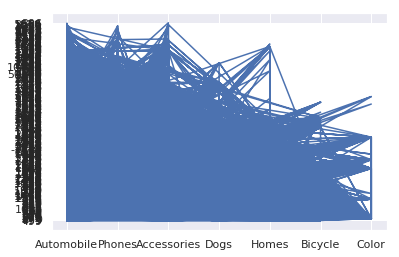

In [0]:
plt.plot(df1.ItemCategory, df1.Sales)
plt.show()

Creating dataframe 'dfS1TimeFrame1' for Store 1 and timeframe upto December 31 2018

In [0]:
dfS1TimeFrame1 = df1[df1.PeriodID <= '20181231']

Creating dataframe  'dfS1TimeFrame1' for Store 1 and timeframe from January 1st to July 31st 2019

In [0]:
dfS1TimeFrame2 = df1[df1.PeriodID >= '20190101']

In [0]:
dfS1TimeFrame1.info()
dfS1TimeFrame2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42859 entries, 0 to 42858
Data columns (total 9 columns):
StoreID         42859 non-null object
StoreGroup      42859 non-null object
PeriodID        42859 non-null object
TicketID        42859 non-null object
ItemName        42859 non-null object
ItemCategory    42859 non-null object
Qty             42859 non-null object
Sales           42859 non-null object
Modifier        42859 non-null object
dtypes: object(9)
memory usage: 3.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 55816 entries, 42859 to 98674
Data columns (total 9 columns):
StoreID         55816 non-null object
StoreGroup      55816 non-null object
PeriodID        55816 non-null object
TicketID        55816 non-null object
ItemName        55816 non-null object
ItemCategory    55816 non-null object
Qty             55816 non-null object
Sales           55816 non-null object
Modifier        55816 non-null object
dtypes: object(9)
memory usage: 4.3+ MB


In [0]:
dfS1TimeFrame1.head()

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
0,1,A,20180801,1,Chevy-Ajax,Automobile,1,499,0
1,1,A,20180801,2,Chevy-Spark,Automobile,1,499,0
2,1,A,20180801,3,Chevy-Colorado,Automobile,1,799,0
3,1,A,20180801,3,Chevy-Gemini,Automobile,1,679,0
4,1,A,20180801,3,WND,Phones,2,0,1


In [0]:
dfS1TimeFrame2.StoreID.iloc[0]

'1'

In [0]:
min(dfS1TimeFrame1.Sales)

'-1698'

In [0]:
negativeVal = dfS1TimeFrame1[dfS1TimeFrame1.Sales < '0']
negativeVal

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
2251,1,A,20180809,33,Ford-Focus,Automobile,2,-1698,0
2252,1,A,20180809,33,Google,Phones,1,-199,0


Correcting two negative values to positive

In [0]:
dfS1TimeFrame1['Sales'] = dfS1TimeFrame1['Sales'].str.replace('-','')
dfS1TimeFrame1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
0,1,A,20180801,1,Chevy-Ajax,Automobile,1,499,0
1,1,A,20180801,2,Chevy-Spark,Automobile,1,499,0
2,1,A,20180801,3,Chevy-Colorado,Automobile,1,799,0
3,1,A,20180801,3,Chevy-Gemini,Automobile,1,679,0
4,1,A,20180801,3,WND,Phones,2,0,1


In [0]:
negativeVal = dfS1TimeFrame1[dfS1TimeFrame1.Sales < '0']
negativeVal

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier


Changing the numerical value columns to int variable

In [0]:
dfS1TimeFrame1['StoreID'] = dfS1TimeFrame1['StoreID'].astype(str).astype(int)
#dfS1TimeFrame1['PeriodID'] = dfS1TimeFrame1['PeriodID'].astype(str).astype(int)
dfS1TimeFrame1['TicketID'] = dfS1TimeFrame1['TicketID'].astype(str).astype(int)
dfS1TimeFrame1['Qty'] = dfS1TimeFrame1['Qty'].astype(str).astype(int)
dfS1TimeFrame1['Sales'] = dfS1TimeFrame1['Sales'].astype(str).astype(int)
dfS1TimeFrame1['Modifier'] = dfS1TimeFrame1['Modifier'].astype(str).astype(int)
#dfS1TimeFrame1['StoreGroup'] = dfS1TimeFrame1['StoreGroup'].astype('str')
#dfS1TimeFrame1['ItemName'] = dfS1TimeFrame1['ItemName'].astype('str')
#dfS1TimeFrame1['ItemCategory'] = dfS1TimeFrame1['ItemCategory'].astype('str')
dfS1TimeFrame1.info()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42859 entries, 0 to 42858
Data columns (total 9 columns):
StoreID         42859 non-null int64
StoreGroup      42859 non-null object
PeriodID        42859 non-null object
TicketID        42859 non-null int64
ItemName        42859 non-null object
ItemCategory    42859 non-null object
Qty             42859 non-null int64
Sales           42859 non-null int64
Modifier        42859 non-null int64
dtypes: int64(5), object(4)
memory usage: 3.3+ MB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Scatterplot of TicketID vs Quantity

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


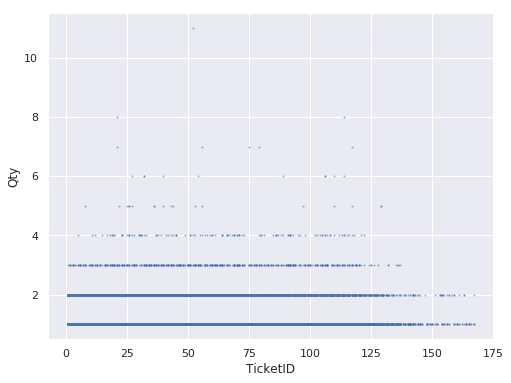

In [0]:
def var_scatter(dfS1TimeFrame1, var):
    ax=None
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))
    dfS1TimeFrame1.plot.scatter(x=var , y="Qty", alpha=0.35, s=1.5, ax=ax)

    return ax

var_scatter(dfS1TimeFrame1, "TicketID");

Plot of Sales amount with respect to Period

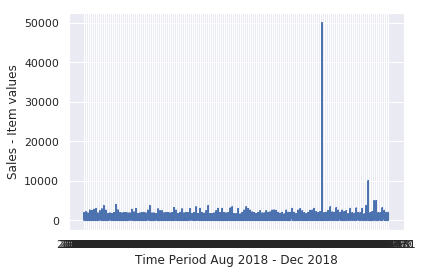

In [0]:
plt.plot(dfS1TimeFrame1.PeriodID, dfS1TimeFrame1.Sales)
plt.xlabel('Time Period Aug 2018 - Dec 2018')
plt.ylabel('Sales - Item values')
plt.show()

Comparision plot of Quantity and Sales with respect to each Ticket ID

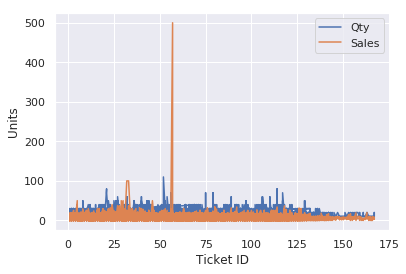

In [0]:
plt.plot(dfS1TimeFrame1.TicketID,dfS1TimeFrame1.Qty * 10)
plt.plot(dfS1TimeFrame1.TicketID,dfS1TimeFrame1.Sales/10**2)
plt.legend(['Qty', 'Sales'])
plt.xlabel('Ticket ID')
plt.ylabel('Units')
plt.show()

Comparision of Quantity and Sales with respect to each TicketID as percentage growth when compared with sales amount of first TicketID

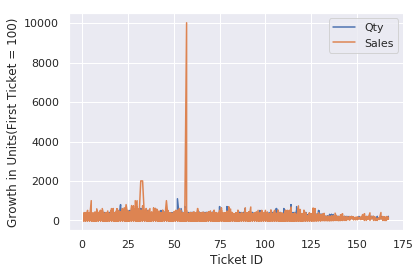

In [0]:
plt.plot(dfS1TimeFrame1.TicketID,dfS1TimeFrame1.Qty / dfS1TimeFrame1.Qty.iloc[0] * 100)
plt.plot(dfS1TimeFrame1.TicketID,dfS1TimeFrame1.Sales / dfS1TimeFrame1.Sales.iloc[0]*100)
plt.legend(['Qty', 'Sales'])
plt.xlabel('Ticket ID')
plt.ylabel('Growth in Units(First Ticket = 100)')
plt.show()

Determining the outlier Sales amount 

In [0]:
maxSalesValue = dfS1TimeFrame1[dfS1TimeFrame1.Sales > 5000]
maxSalesValue

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
32908,1,A,20181128,57,Keychain,Accessories,1,50000,0
39175,1,A,20181221,32,Keychain,Accessories,1,10000,0
39176,1,A,20181221,33,Keychain,Accessories,1,10000,0


Pattern of higher sales value for respective ItemName 'Keychain'

In [0]:
itemKC = dfS1TimeFrame1[dfS1TimeFrame1.ItemName == 'Keychain']
itemKC

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
4050,1,A,20180817,24,Keychain,Accessories,1,4000,0
26243,1,A,20181105,25,Keychain,Accessories,1,2500,0
30952,1,A,20181122,34,Keychain,Accessories,1,2500,0
31660,1,A,20181124,11,Keychain,Accessories,1,3000,0
32908,1,A,20181128,57,Keychain,Accessories,1,50000,0
34370,1,A,20181203,23,Keychain,Accessories,1,1000,0
35228,1,A,20181207,28,Keychain,Accessories,2,2000,0
36708,1,A,20181212,22,Keychain,Accessories,1,3000,0
39145,1,A,20181221,20,Keychain,Accessories,1,500,0
39172,1,A,20181221,29,Keychain,Accessories,1,5000,0


Determining higher quantity order ticketids

In [0]:
maxQtyValue = dfS1TimeFrame1[dfS1TimeFrame1.Qty > 5]
maxQtyValue

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
4556,1,A,20180818,114,Apple,Phones,8,1512,0
6772,1,A,20180826,106,WND,Phones,6,0,1
7998,1,A,20180901,56,Google,Phones,7,1393,0
8919,1,A,20180903,79,WND,Phones,7,0,1
11622,1,A,20180914,54,WND,Phones,6,0,1
12140,1,A,20180915,114,Google,Phones,6,1194,0
12621,1,A,20180916,106,LG,Phones,6,1494,0
13451,1,A,20180921,32,WND,Phones,6,0,1
16672,1,A,20181003,32,Google,Phones,6,1194,0
27861,1,A,20181111,27,WND,Phones,6,0,1


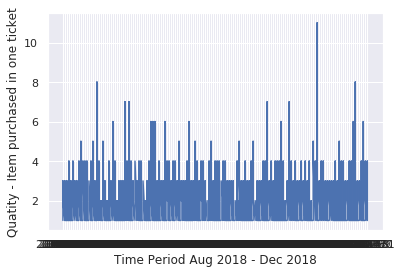

In [0]:
plt.plot(dfS1TimeFrame1.PeriodID, dfS1TimeFrame1.Qty)
plt.xlabel('Time Period Aug 2018 - Dec 2018')
plt.ylabel('Quatity - Item purchased in one ticket')
plt.show()

Order details with 0 sales amount

In [0]:
zeroSales = dfS1TimeFrame1[dfS1TimeFrame1.Sales == 0]
zeroSales.describe(include='all')

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
count,4667.0,4667,4667,4667.000000,4667,4667,4667.000000,4667.0,4667.0
unique,NaN,1,153,NaN,5,3,NaN,NaN,NaN
top,NaN,A,20181118,NaN,WND,Phones,NaN,NaN,NaN
freq,NaN,4667,64,NaN,3850,4109,NaN,NaN,NaN
mean,1.0,NaN,NaN,53.760874,NaN,NaN,1.367474,0.0,1.0
std,0.0,NaN,NaN,33.177054,NaN,NaN,0.688648,0.0,0.0
min,1.0,NaN,NaN,1.000000,NaN,NaN,1.000000,0.0,1.0
25%,1.0,NaN,NaN,26.000000,NaN,NaN,1.000000,0.0,1.0
50%,1.0,NaN,NaN,50.000000,NaN,NaN,1.000000,0.0,1.0
75%,1.0,NaN,NaN,76.000000,NaN,NaN,2.000000,0.0,1.0


In [0]:
dfS1TimeFrame1.head()

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
0,1,A,20180801,1,Chevy-Ajax,Automobile,1,499,0
1,1,A,20180801,2,Chevy-Spark,Automobile,1,499,0
2,1,A,20180801,3,Chevy-Colorado,Automobile,1,799,0
3,1,A,20180801,3,Chevy-Gemini,Automobile,1,679,0
4,1,A,20180801,3,WND,Phones,2,0,1


#read corpus document for ItemCategory and ItemName

In [0]:
linkName = 'https://drive.google.com/open?id=1FRYHkDrUeBo7BPodWPfdYe4Ij3i1E3Vs'

In [0]:
fluff, id = linkName.split('=')
print (id) # Verify that you have everything after '='

1FRYHkDrUeBo7BPodWPfdYe4Ij3i1E3Vs


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('itemNameDocument.txt')  
itemNameData = pd.read_csv('itemNameDocument.txt')

In [0]:
itemNameData.head()

,ItemName
0,Chevy-Ajax Ford-E250 Ford-E250 Chevy-Lanos App...
1,Chevy-Spark Chevy-Camaro Apple Chevy-Colorado ...
2,Chevy-Colorado Chevy-Gemini WND Ford-Crown-Vic...
3,Luxury-Package Apple Ford-Expedition Bose-Spea...
4,Chevy-Spark Ford-Focus Apple Ford-E250 Ford-Fo...


In [0]:
linkCat = 'https://drive.google.com/open?id=1xc8x1_jPRduyc7oYGVdou15m2GFY4eSH'

In [0]:
fluff, id = linkCat.split('=')
print (id) # Verify that you have everything after '='

1xc8x1_jPRduyc7oYGVdou15m2GFY4eSH


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('itemCategoryDocument.txt')  
itemCategoryData = pd.read_csv('itemCategoryDocument.txt')

In [0]:
itemCategoryData.head()

,ItemCategory
0,Automobile Automobile Automobile Automobile Ph...
1,Automobile Automobile Phones Automobile Phones...
2,Automobile Automobile Phones Automobile Phones...
3,Accessories Phones Automobile Accessories Auto...
4,Automobile Automobile Phones Automobile Automo...


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
import operator

In [0]:
#select column to convert to list here
itemNameCorpus = itemNameData["ItemName"].tolist()
#itemNameCorpus
itemNameCorpus = [x.lower() for x in itemNameCorpus]
len(itemNameCorpus)

167

In [0]:
#set() takes the unique values and set in vocabulary
vocabulary = set()
for documentValue in itemNameCorpus:
    vocabulary.update(documentValue.split())

In [0]:
#len(vocabulary)
print(vocabulary)

{'wnd', 'chevy-lee', 'townhome', 'sony', 'chrysler-royal', 'german-shepherd', 'solor-powered-vent', 'ford-model-c', 'jamis', 'chevy-impala', 'felt', 'chevy-corvair', 'ford-laser', 'ford-model-4-46', 'light-covers', 'chevy-cavalier', 'toyota-fortuner', 'chevy-viva', 'crimson', 'regular-floor-mats', 'ford-e150', 'dodge-intrepid', 'ford-contour', 'ford-f250', 'keychain', 'dodge-330', 'cabin', 'chevy-cobalt', 'ford-explorer', 'single-family-(detached)', 'bungalow', 'chevy-beretta', 'ford-escort', 'chevy-sonic', 'ford-model-ac', 'chevy-standard', 'ford-f150', 'chevy-tahoe', 'chevy-uplander', 'chevy-c/k', 'lg', 'ford-xl', 'chrysler-saratoga', 'chevy-g506', 'chrysler-aspen', 'ford-eifel', 'ford-camete', 'map-holder', 'boxer', 'fix-a-flat', '600w-power-inverter', 'ford-bronco', 'nec', 'spare-tire-cover', 'dodge-ram-3500', 'german-pointer', 'at&t', 'google', 'radar-detector', 'ford-fusion', 'premium-seat-covers', '400w-power-inverter', 'ford-e250', 'saturn-sky', 'chevy-caprice', 'ford-edge', 'f

In [0]:
vocabulary = list(vocabulary)

In [0]:
#vocabulary

In [0]:
#assigning index value to each vocabulary word
wordInd = {word: idx for idx, word in enumerate(vocabulary)}

In [0]:
#wordInd

In [0]:
tfidf = TfidfVectorizer(vocabulary=vocabulary)

In [0]:
tfidf.fit(itemNameCorpus)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use...
                            'solor-powered-vent', 'ford-model-c', 'jamis',
                            'chevy-impala', 'felt', 'chevy-corvair',
                            'ford-laser', 'ford-model-4-46', 'light-covers',
                            'chevy-cavalier', 'toyota-fortuner', 'chevy-viva',
                            'crimson', 'regular-floor-mats', 'ford-e150',
                            'dodge-intrepid', 'ford-contour', 'ford-f250',
                            'keychain', 'dodge-330', 'cabin', 'chevy-cobalt',
  

In [0]:
tfidf.transform(itemNameCorpus)

<167x250 sparse matrix of type '<class 'numpy.float64'>'
	with 1987 stored elements in Compressed Sparse Row format>

In [0]:
tfidfItemNameDF = pd.DataFrame()
map = {'400w-power-inverter': 0,
 '600w-power-inverter': 0,
 'alan': 0,
 'allview': 0,
 'amazon': 0,
 'amoi': 0,
 'apartment': 0,
 'apple': 0,
 'archos': 0,
 'asus': 0,
 'at&t': 0,
 'australian-shepherd': 0,
 'backup-camera': 0,
 'benq-siemens': 0,
 'bike-hauler': 0,
 'blackberry': 0,
 'blackview': 0,
 'bmc': 0,
 'bobble-head': 0,
 'bose-speakers': 0,
 'boxer': 0,
 'built-in-phone': 0,
 'bungalow': 0,
 'cabin': 0,
 'cannondale': 0,
 'car-sales-decal': 0,
 'carriage/coach': 0,
 'chalet': 0,
 'chevy-210': 0,
 'chevy-ajax': 0,
 'chevy-astro': 0,
 'chevy-beretta': 0,
 'chevy-blazer': 0,
 'chevy-c/k': 0,
 'chevy-camaro': 0,
 'chevy-cameo': 0,
 'chevy-caprice': 0,
 'chevy-cavalier': 0,
 'chevy-celta': 0,
 'chevy-chevelle': 0,
 'chevy-cobalt': 0,
 'chevy-colorado': 0,
 'chevy-constantia': 0,
 'chevy-corvair': 0,
 'chevy-delray': 0,
 'chevy-forester': 0,
 'chevy-g506': 0,
 'chevy-gemini': 0,
 'chevy-greenbrier': 0,
 'chevy-hhr': 0,
 'chevy-impala': 0,
 'chevy-lakewood': 0,
 'chevy-lanos': 0,
 'chevy-lee': 0,
 'chevy-mercury': 0,
 'chevy-monte-carlo': 0,
 'chevy-nova': 0,
 'chevy-onix': 0,
 'chevy-sonic': 0,
 'chevy-spark': 0,
 'chevy-standard': 0,
 'chevy-tahoe': 0,
 'chevy-trailblazer': 0,
 'chevy-traverse': 0,
 'chevy-uplander': 0,
 'chevy-van': 0,
 'chevy-vega': 0,
 'chevy-viking': 0,
 'chevy-viva': 0,
 'chrysler-300': 0,
 'chrysler-airstream': 0,
 'chrysler-aspen': 0,
 'chrysler-cordoba': 0,
 'chrysler-crossfire': 0,
 'chrysler-fifth-avenue': 0,
 'chrysler-newport': 0,
 'chrysler-prowler': 0,
 'chrysler-royal': 0,
 'chrysler-saratoga': 0,
 'chrysler-sebring': 0,
 'chrysler-sunbeem': 0,
 'chrysler-town-and-country': 0,
 'co-op': 0,
 'condominium': 0,
 'cooler': 0,
 'cottage': 0,
 'crimson': 0,
 'dash-camera': 0,
 'desert-sand': 0,
 'dodge-330': 0,
 'dodge-400': 0,
 'dodge-aries': 0,
 'dodge-durango': 0,
 'dodge-intrepid': 0,
 'dodge-kingsway': 0,
 'dodge-lancer': 0,
 'dodge-meadowbrook': 0,
 'dodge-olara': 0,
 'dodge-omni': 0,
 'dodge-ram-2500': 0,
 'dodge-ram-3500': 0,
 'dodge-stratus': 0,
 'dodge-viper': 0,
 'emergency-roadside-kit': 0,
 'febreeze-spray': 0,
 'felt': 0,
 'fire-extinguisher': 0,
 'first-aid-kit': 0,
 'fish-for-trailer-hitch': 0,
 'fix-a-flat': 0,
 'ford-abeille': 0,
 'ford-aspire': 0,
 'ford-b-max': 0,
 'ford-bronco': 0,
 'ford-camete': 0,
 'ford-contour': 0,
 'ford-crestline': 0,
 'ford-crown-victoria': 0,
 'ford-custom-500': 0,
 'ford-custom-deluxe': 0,
 'ford-del-rey': 0,
 'ford-e150': 0,
 'ford-e250': 0,
 'ford-edge': 0,
 'ford-eifel': 0,
 'ford-endeavor': 0,
 'ford-escape': 0,
 'ford-escort': 0,
 'ford-expedition': 0,
 'ford-explorer': 0,
 'ford-explorer-sport-trac': 0,
 'ford-f-550': 0,
 'ford-f150': 0,
 'ford-f250': 0,
 'ford-festiva': 0,
 'ford-five-hundred': 0,
 'ford-flex': 0,
 'ford-focus': 0,
 'ford-fusion': 0,
 'ford-gt40': 0,
 'ford-gtx1': 0,
 'ford-kuga': 0,
 'ford-laser': 0,
 'ford-lobo': 0,
 'ford-model-4-46': 0,
 'ford-model-69a/gga': 0,
 'ford-model-73/77': 0,
 'ford-model-ac': 0,
 'ford-model-b': 0,
 'ford-model-c': 0,
 'ford-probe': 0,
 'ford-quadricycle': 0,
 'ford-ranch-wagon': 0,
 'ford-super-deluxe': 0,
 'ford-svt-raptor': 0,
 'ford-taurus': 0,
 'ford-telstar': 0,
 'ford-thunderbird': 0,
 'ford-transcontinental': 0,
 'ford-xl': 0,
 'french-bulldog': 0,
 'fuji': 0,
 'german-pointer': 0,
 'german-shepherd': 0,
 'golden-retriever': 0,
 'google': 0,
 'gps-unit': 0,
 'greater-swiss-mountain-dog': 0,
 'halogen-lights': 0,
 'highspeed-charger': 0,
 'in-law-suite': 0,
 'inflatable-car-jack': 0,
 'jamis': 0,
 'jumper-cables': 0,
 'keychain': 0,
 'kia-k4': 0,
 'kia-optima': 0,
 'kia-picanto': 0,
 'kia-rio': 0,
 'kia-sedona': 0,
 'kia-stinger': 0,
 'kia-telluride': 0,
 'leather-cleaner': 0,
 'lg': 0,
 'light-covers': 0,
 'lincoln-2010': 0,
 'lincoln-continental': 0,
 'lincoln-mkx': 0,
 'luggage-hauler': 0,
 'luxury-package': 0,
 'map-holder': 0,
 'marin': 0,
 'merida': 0,
 'metallic-blue': 0,
 'microsoft': 0,
 'multi-family': 0,
 'navigation-system': 0,
 'nec': 0,
 'newfoundland': 0,
 'nylon-seat-covers': 0,
 'obd2-scanner': 0,
 'ochre': 0,
 'parking-sensors': 0,
 'periwinkle': 0,
 'pillows': 0,
 'pomeranian': 0,
 'poodle': 0,
 'preimum-car-wash': 0,
 'premium-seat-covers': 0,
 'radar-detector': 0,
 'ranch-style': 0,
 'rear-spoiler': 0,
 'regular-floor-mats': 0,
 'roll-bar': 0,
 'roll-cage': 0,
 'safety-hammer': 0,
 'samsung': 0,
 'saturn-ion': 0,
 'saturn-sky': 0,
 'seatbelt-cutter': 0,
 'shetland-sheepdog': 0,
 'single-family-(detached)': 0,
 'smart-dirving-assistant': 0,
 'solor-powered-vent': 0,
 'sony': 0,
 'spare-tire-cover': 0,
 'sport-package': 0,
 'suction-grip': 0,
 'tan': 0,
 'tinted-windows': 0,
 'tiny': 0,
 'towing-package': 0,
 'townhome': 0,
 'toyota-4runner': 0,
 'toyota-century': 0,
 'toyota-corolla': 0,
 'toyota-crown': 0,
 'toyota-fortuner': 0,
 'toyota-land-cruiser': 0,
 'toyota-porte': 0,
 'toyota-prius': 0,
 'toyota-tacoma': 0,
 'toyota-tundra': 0,
 'toyota-voxy': 0,
 'trek': 0,
 'ultramarine': 0,
 'vehicle-cover': 0,
 'wheelchair-ramp': 0,
 'wnd': 0,
 'worksman-cycles': 0}

In [0]:
scoreValue={}
for document in itemNameCorpus:
    score={}
    #print()
    #print (document)
    #print()
    transform = tfidf.transform([document])
    for value in document.split():
        score[value] = transform[0, tfidf.vocabulary_[value]]
    scoreValue = sorted(score.items(), key=operator.itemgetter(1), reverse=True)
    new_row = pd.Series()
    for a in scoreValue:
      map[a[0]] =a[1]
    new_row = pd.Series(map)
    tfidfItemNameDF = tfidfItemNameDF.append(new_row, ignore_index=True)
    #print ("\t", scoreValue)
    #print()

In [0]:
tfidfItemNameDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Columns: 250 entries, 400w-power-inverter to worksman-cycles
dtypes: float64(250)
memory usage: 326.2 KB


In [0]:
tfidfItemNameDF = tfidfItemNameDF.loc[:,(tfidfItemNameDF != 0).any(axis=0)]
tfidfItemNameDF.shape
tfidfItemNameDF.describe()

,alan,allview,amazon,amoi,apartment,apple,archos,asus,blackberry,blackview,bmc,boxer,bungalow,cabin,cannondale,chalet,condominium,cooler,cottage,crimson,felt,fuji,google,jamis,keychain,lg,marin,merida,microsoft,nec,newfoundland,ochre,periwinkle,pillows,pomeranian,poodle,samsung,sony,tan,tiny,townhome,trek,ultramarine,wnd
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.142234,0.095412,0.087293,0.045717,0.087038,0.702343,0.073528,0.045101,0.086221,0.054291,0.117056,0.066688,0.066849,0.047589,0.111411,0.096254,0.097309,0.062201,0.092730,0.079325,0.111241,0.052608,0.349507,0.078674,0.029998,0.183642,0.129294,0.056317,0.152676,0.090353,0.084433,0.042822,0.050186,0.038946,0.094755,0.100440,0.360528,0.111884,0.125716,0.135460,0.108987,0.055220,0.041484,0.515854
std,0.197872,0.101744,0.083269,0.006202,0.081735,0.164390,0.052910,0.007212,0.078441,0.014995,0.146143,0.034220,0.050384,0.009799,0.144136,0.082577,0.098445,0.033509,0.094910,0.055098,0.126884,0.023182,0.154722,0.063839,0.008637,0.212692,0.164495,0.035059,0.249827,0.092245,0.058027,0.008304,0.006041,0.030017,0.084007,0.093376,0.194867,0.137570,0.144939,0.178655,0.123348,0.068516,0.021607,0.150023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.255104,0.013604,0.000000,0.013134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.092556,0.000000,0.000000,0.012269,0.000000,0.000000,0.014732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.186279
25%,0.028587,0.030003,0.022649,0.046509,0.023413,0.630700,0.031061,0.045903,0.029892,0.042864,0.026269,0.039343,0.025358,0.038837,0.029557,0.036157,0.026233,0.039187,0.029387,0.053456,0.040820,0.029662,0.238370,0.031946,0.028609,0.069305,0.027513,0.027202,0.031494,0.030563,0.042264,0.044592,0.049588,0.000000,0.032690,0.028004,0.248395,0.021066,0.034193,0.028905,0.023974,0.000000,0.042789,0.415791
50%,0.072458,0.049290,0.050176,0.046509,0.051017,0.709221,0.052005,0.045903,0.047750,0.065467,0.052218,0.050178,0.052466,0.054435,0.049561,0.053499,0.053679,0.082988,0.037850,0.053456,0.040820,0.046714,0.320042,0.060069,0.028609,0.099188,0.041273,0.048205,0.053785,0.059316,0.054435,0.044592,0.049588,0.061942,0.057094,0.057393,0.318049,0.047726,0.056114,0.061550,0.043033,0.000000,0.042789,0.490980
75%,0.122880,0.094267,0.222982,0.046509,0.152200,0.796433,0.102627,0.045903,0.121249,0.065467,0.084656,0.099565,0.125005,0.054435,0.106012,0.207452,0.114161,0.093403,0.158784,0.157097,0.308919,0.076566,0.410403,0.174777,0.028609,0.167815,0.132935,0.105219,0.086042,0.121154,0.165046,0.044592,0.049588,0.061942,0.214526,0.142962,0.404038,0.117125,0.195642,0.100791,0.135544,0.139724,0.042789,0.555335
max,0.732201,0.286253,0.228163,0.046713,0.219804,1.000000,0.205847,0.048536,0.228787,0.065467,0.439011,0.099565,0.144318,0.054435,0.557009,0.253264,0.269650,0.093403,0.256819,0.157097,0.308919,0.116537,1.000000,0.174777,0.064605,0.756708,0.465065,0.120817,0.833773,0.361573,0.165046,0.044592,0.055619,0.061942,0.214526,0.266449,1.000000,0.405668,0.382398,0.490317,0.387687,0.139724,0.084983,1.000000


In [0]:
tfidfItemNameDF.head()

,alan,allview,amazon,amoi,apartment,apple,archos,asus,blackberry,blackview,bmc,boxer,bungalow,cabin,cannondale,chalet,condominium,cooler,cottage,crimson,felt,fuji,google,jamis,keychain,lg,marin,merida,microsoft,nec,newfoundland,ochre,periwinkle,pillows,pomeranian,poodle,samsung,sony,tan,tiny,townhome,trek,ultramarine,wnd
0,0.0,0.000000,0.000000,0.000000,0.0,0.907779,0.089246,0.000000,0.020592,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.247658,0.0,0.000000,0.126928,0.0,0.0,0.046194,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.187986,0.0,0.0,0.0,0.000000,0.0,0.0,0.229413
1,0.0,0.018997,0.000000,0.000000,0.0,0.955045,0.072891,0.000000,0.050455,0.0,0.022772,0.0,0.0,0.000000,0.017382,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.113777,0.0,0.000000,0.074048,0.0,0.0,0.046194,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.063973,0.0,0.0,0.0,0.000000,0.0,0.0,0.237335
2,0.0,0.018739,0.000000,0.000000,0.0,0.929705,0.072891,0.000000,0.050455,0.0,0.022772,0.0,0.0,0.000000,0.017147,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.124706,0.0,0.000000,0.116870,0.0,0.0,0.037217,0.030914,0.0,0.0,0.055619,0.0,0.0,0.0,0.113591,0.0,0.0,0.0,0.000000,0.0,0.0,0.295729
3,0.0,0.018739,0.020196,0.046713,0.0,0.968223,0.045291,0.000000,0.013934,0.0,0.022772,0.0,0.0,0.038837,0.017147,0.0,0.0,0.0,0.0,0.0,0.0,0.027779,0.104736,0.0,0.000000,0.012269,0.0,0.0,0.037217,0.012982,0.0,0.0,0.055619,0.0,0.0,0.0,0.095401,0.0,0.0,0.0,0.018413,0.0,0.0,0.186279
4,0.0,0.015454,0.020196,0.046713,0.0,0.940474,0.045291,0.043241,0.013681,0.0,0.022772,0.0,0.0,0.038837,0.017147,0.0,0.0,0.0,0.0,0.0,0.0,0.027779,0.092556,0.0,0.028552,0.132520,0.0,0.0,0.037217,0.012747,0.0,0.0,0.055619,0.0,0.0,0.0,0.104082,0.0,0.0,0.0,0.018413,0.0,0.0,0.274360


In [0]:
pip install textmining==1.0

     |████████████████████████████████| 1.9MB 2.8MB/s 
  Created wheel for textmining: filename=textmining-1.0-cp36-none-any.whl size=1855282 sha256=c49a0a29f9425063d891d95e8d7065227dbf7450ceb937661c389d4a4f34a2d0
  Stored in directory: /root/.cache/pip/wheels/7a/1f/78/0a67c3d717378ec9d9a840a8d7d2b959796cbf505f388d35ea
Successfully built textmining


In [0]:
pip install PyStemmer

     |████████████████████████████████| 368kB 2.9MB/s 
  Created wheel for PyStemmer: filename=PyStemmer-1.3.0-cp36-cp36m-linux_x86_64.whl size=284188 sha256=2251849ffb7ab079918bae607f55f907fa2e21dcd4257bfba7c29316618d5794
  Stored in directory: /root/.cache/pip/wheels/fd/4f/e7/fcd0ee2485542e01543db5b4339625f4c05f0e267d10adefd9
Successfully built PyStemmer


In [0]:
import textmining

In [0]:
tdm = textmining.TermDocumentMatrix()
resultListName = []

for documentValue in itemNameCorpus:
    tdm.add_doc(documentValue)
    
for row in tdm.rows(cutoff=1):
    #print(row)
    resultListName.append(row)

#resultListName

In [0]:
tdmDataFrameName = pd.DataFrame.from_dict (resultListName)
tdmDataFrameName.columns = tdmDataFrameName.iloc[0]

In [0]:
tdmDataFrameName = tdmDataFrameName.drop([0], axis=0)
tdmDataFrameName.reset_index(drop=True, inplace=True)

In [0]:
tdmDataFrameName.head()

,chevy,ajax,ford,e,lanos,apple,vehicle,cover,explorer,sport,trac,archos,toyota,tacoma,dodge,stratus,century,samsung,chrysler,prowler,crown,victoria,tahoe,towing,package,wnd,spark,lg,kia,rio,runner,expedition,durango,luxury,fusion,rear,spoiler,edge,colorado,google,...,cooler,backup,ultramarine,australian,shepherd,svt,raptor,suction,grip,tan,thunderbird,felt,laser,fortuner,sky,greater,swiss,mountain,dog,gga,celta,smart,dirving,assistant,bobble,head,xl,telstar,abeille,del,rey,pillows,astro,cameo,hhr,first,aid,trek,airstream,intrepid
0,43,2,74,11,2,59,1,1,10,11,10,4,27,6,6,2,1,12,13,9,8,8,4,2,6,15,2,7,8,7,1,4,1,3,5,7,7,3,18,16,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,51,3,80,7,0,76,0,0,13,13,13,4,36,4,3,0,0,5,17,11,4,4,5,1,1,19,8,5,10,5,4,4,1,0,4,0,0,5,13,9,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,42,0,67,7,4,75,2,3,9,8,8,0,32,2,11,0,0,9,24,20,6,5,4,3,4,24,2,8,9,4,3,5,1,1,2,1,1,4,12,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,44,0,72,1,4,93,1,3,15,17,14,3,22,2,9,2,1,9,18,16,10,10,5,4,9,18,4,1,13,7,0,8,0,2,4,0,0,3,9,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,44,0,81,3,1,92,2,2,6,5,5,0,24,3,6,1,1,10,28,27,10,10,7,4,10,27,2,11,9,4,1,5,1,6,6,2,2,5,11,9,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#select column to convert to list here
itemCategoryCorpus = itemCategoryData["ItemCategory"].tolist()
#itemCategoryCorpus
itemCategoryCorpus = [x.lower() for x in itemCategoryCorpus]
len(itemCategoryCorpus)

167

In [0]:
#set() takes the unique values and set in vocabulary
vocabularyCategory = set()
for documentValue in itemCategoryCorpus:
    vocabularyCategory.update(documentValue.split())

In [0]:
vocabularyCategory = list(vocabularyCategory)

In [0]:
vocabularyCategory

['bicycle', 'homes', 'accessories', 'color', 'phones', 'automobile', 'dogs']

In [0]:
wordIndCategory = {word: idx for idx, word in enumerate(vocabularyCategory)}

In [0]:
tfidfCategory = TfidfVectorizer(vocabulary=vocabularyCategory)

In [0]:
tfidfCategory.fit(itemCategoryCorpus)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True,
                vocabulary=['bicycle', 'homes', 'accessories', 'color',
                            'phones', 'automobile', 'dogs'])

In [0]:
tfidfCategory.transform(itemCategoryCorpus)

<167x7 sparse matrix of type '<class 'numpy.float64'>'
	with 981 stored elements in Compressed Sparse Row format>

In [0]:
tfidfItemCategoryDF = pd.DataFrame()
map = {"accessories": 0, "automobile": 0, "bicycle": 0, "color":0, "dogs":0, "homes":0, "phones":0}

In [0]:
for document in itemCategoryCorpus:
    score={}
    #print()
    #print (document)
    #print()
    transform = tfidfCategory.transform([document])
    for value in document.split():
        score[value] = transform[0, tfidfCategory.vocabulary_[value]]
    scoreValue = sorted(score.items(), key=operator.itemgetter(1), reverse=True)
    #print ("\t", scoreValue)
    new_row = pd.Series()
    for a in scoreValue:
      map[a[0]] =a[1]
    new_row = pd.Series(map)
    tfidfItemCategoryDF = tfidfItemCategoryDF.append(new_row, ignore_index=True)
    #print()

In [0]:
tfidfItemCategoryDF.head()

,accessories,automobile,bicycle,color,dogs,homes,phones
0,0.142228,0.815227,0.000000,0.042723,0.006536,0.005570,0.559711
1,0.097209,0.846469,0.010647,0.016268,0.006536,0.009898,0.523035
2,0.140244,0.802851,0.005486,0.027941,0.006536,0.009898,0.578749
3,0.116105,0.778537,0.005529,0.050689,0.006536,0.015420,0.614461
4,0.155725,0.769871,0.005529,0.030660,0.005473,0.004664,0.618107


In [0]:
tfidfItemCategoryDF.describe()

,accessories,automobile,bicycle,color,dogs,homes,phones
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.215816,0.747793,0.088376,0.081861,0.067492,0.080301,0.621839
std,0.166268,0.080219,0.141553,0.134690,0.131542,0.112437,0.074688
min,0.044701,0.322024,0.000000,0.004476,0.004505,0.004160,0.167279
25%,0.128822,0.732849,0.022904,0.019729,0.011931,0.020619,0.613701
50%,0.159121,0.751460,0.034408,0.030237,0.023850,0.035851,0.632984
75%,0.195787,0.770372,0.059940,0.049999,0.048641,0.067183,0.651956
max,0.628853,1.000000,0.703138,0.497680,0.888162,0.635713,0.836578


In [0]:
tdm2 = textmining.TermDocumentMatrix()
resultListCategory = []

for documentValue in itemCategoryCorpus:
    tdm2.add_doc(documentValue)
    
for row in tdm2.rows(cutoff=1):
    #print(row)
    resultListCategory.append(row)

#resultListCategory
#tdmdataframe = pd.DataFrame({'TDM': resultList})

In [0]:
tdmDataFrameCategory = pd.DataFrame.from_dict (resultListCategory)

In [0]:
tdmDataFrameCategory.columns = tdmDataFrameCategory.iloc[0]

In [0]:
tdmDataFrameCategory = tdmDataFrameCategory.drop([0], axis=0)
tdmDataFrameCategory.reset_index(drop=True, inplace=True)

In [0]:
tdmDataFrameCategory.head(10)

,automobile,phones,accessories,color,homes,dogs,bicycle
0,172,116,26,7,1,1,0
1,201,122,20,3,2,0,2
2,185,131,28,5,0,0,1
3,178,138,23,9,3,0,1
4,194,153,34,6,1,1,0
5,194,163,35,7,1,0,0
6,200,165,30,7,3,0,3
7,201,179,48,6,2,3,4
8,211,179,35,5,3,2,1
9,220,185,27,8,2,0,6


# **Latent Semantic Analysis**

In [0]:
#Latent Semantic Analysis

In [0]:
#LSA according to youtube video of Document Classification using lSA by Sudharsan

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [0]:
#X=vectorizer.fit() #insert document name in the brackets
#For fit and transform
X=vectorizer.fit_transform(itemNameData)
print(X)

  (0, 0)	1.0


In [0]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=1, n_iter=100)

In [0]:
lsa.fit(X)

ValueError: ignored

In [0]:
terms=vectorizer.get_feature_names()

In [0]:
for i,comp in enumerate(lsa.components) :
  termsInComp = zip(terms,comp)
  sortedterms = sorted(termsInComp, key=lambda x: x[1], reverse = True) [:10]
  print("Concept %d",i)
  

# **Cluster Analysis**

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [0]:
#Cluster Analysis - tfidfItemNameDF & tdmDataFrameName   tfidfItemCategoryDF & tdmDataFrameCategory

# **Cluster Analysis of Term Document Matrix Data of Item Category**


In [0]:
tdmDataFrameCategory.head()

,automobile,phones,accessories,color,homes,dogs,bicycle
0,172,116,26,7,1,1,0
1,201,122,20,3,2,0,2
2,185,131,28,5,0,0,1
3,178,138,23,9,3,0,1
4,194,153,34,6,1,1,0


Run PCA on the data and reduce the dimensions in pca_num_components dimensions

In [0]:
from sklearn.preprocessing import StandardScaler
sctdmDFCat = StandardScaler().fit_transform(tdmDataFrameCategory)
sctdmDFCat

array([[ 0.5868628 ,  0.21361075,  0.26447853, ..., -0.81889974,
        -0.44036846, -1.07159835],
       [ 0.92405305,  0.29718669, -0.10616131, ..., -0.5594002 ,
        -0.92103208, -0.48098144],
       [ 0.73801705,  0.4225506 ,  0.38802515, ..., -1.07839928,
        -0.92103208, -0.77628989],
       ...,
       [-1.38976966, -1.36040274, -1.34162748, ..., -1.07839928,
        -0.92103208, -1.07159835],
       [-1.40139691, -1.38826138, -1.34162748, ..., -1.07839928,
        -0.92103208, -1.07159835],
       [-1.40139691, -1.38826138, -1.34162748, ..., -1.07839928,
         0.04029515, -1.07159835]])

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(.85)
principalComponents = pca.fit_transform(sctdmDFCat)
pcatdmCatDf = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])

In [0]:
pcatdmCatDf.head()

,pca1,pca2
0,0.117323,1.989748
1,-0.201208,1.057370
2,-0.073892,1.876749
3,0.575820,2.409911
4,0.529623,1.979047


Initial scatter plot of pca1 and pca2 values

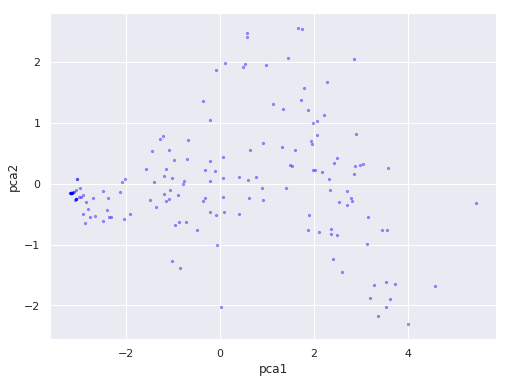

In [0]:
def var_scatter(df):
    ax=None
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))
    df.plot.scatter(x="pca1" , y="pca2", alpha=0.35, s=5, ax=ax, c = "blue")

    return ax

var_scatter(pcatdmCatDf);

Train multiple models using a different number of clusters and storing the value of the intertia_ property (WCSS). These are the numerical measurement used to evaluate clusters. 


---


Within Cluster Sum of Squares (WCSS), which measures the squared average distance of all the points within a cluster to the cluster centroid. 
To calculated ECSS - First, the Euclidean distance between a given point and the centroid to which it is assigned is calculated. Then iterating this process for all points in the cluster, and then sum the values for the cluster and divide by the number of points. Then we calculate the average across all clusters. This will give the average WCSS.


Clustering performance as measured by WCSS increases (or WCSS decreases) with increase in k, rate of increase is usually decreasing. So performance improvement for increasing number of cluster from, say, 2 to 4 is higher than that for increasing from 4 to 6. Plotting WCSS against increasing k can show an ‘elbow’ which demarks significant drop in rate of increase.


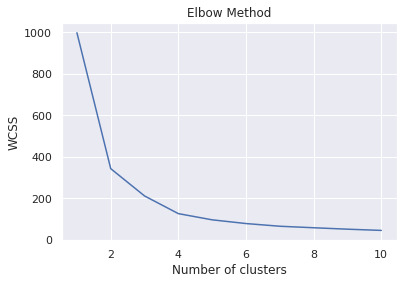

In [0]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pcatdmCatDf)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
clustering_kmeans = KMeans(n_clusters=4, precompute_distances="auto", n_jobs=-1)
pcatdmCatDf['clusters'] = clustering_kmeans.fit_predict(pcatdmCatDf)

In [0]:
pcatdmCatDf.head()

,pca1,pca2,clusters
0,0.117323,1.989748,1
1,-0.201208,1.057370,3
2,-0.073892,1.876749,1
3,0.575820,2.409911,1
4,0.529623,1.979047,1


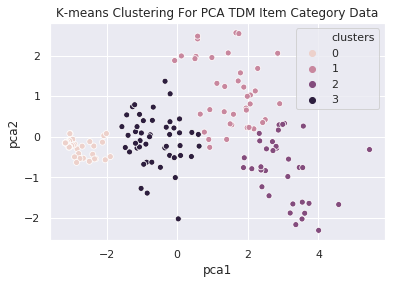

In [0]:
sns.scatterplot(x="pca1", y="pca2", hue=pcatdmCatDf['clusters'], data=pcatdmCatDf)
plt.title('K-means Clustering For PCA TDM Item Category Data')
plt.show()

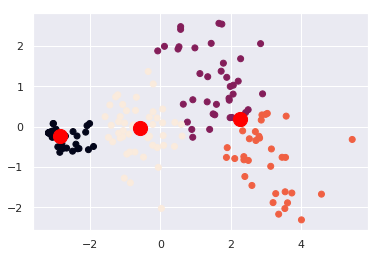

In [0]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(pcatdmCatDf)
plt.scatter(x="pca1", y="pca2", c=pcatdmCatDf['clusters'], data=pcatdmCatDf)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.show()

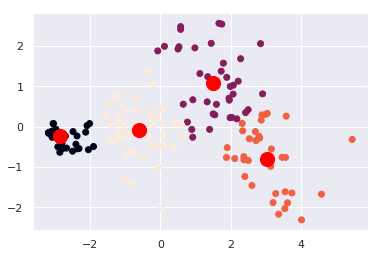

In [0]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(pcatdmCatDf)
plt.scatter(x="pca1", y="pca2", c=pcatdmCatDf['clusters'], data=pcatdmCatDf)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.show()

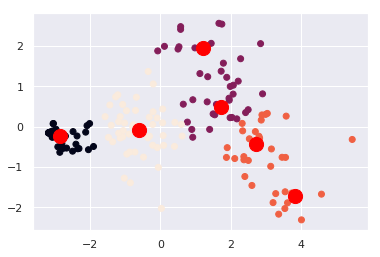

In [0]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(pcatdmCatDf)
plt.scatter(x="pca1", y="pca2", c=pcatdmCatDf['clusters'], data=pcatdmCatDf)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.show()

# **Cluster Analysis of Term Document Matrix Data of Item Name**

In [0]:
tdmDataFrameName.head()

,chevy,ajax,ford,e,lanos,apple,vehicle,cover,explorer,sport,trac,archos,toyota,tacoma,dodge,stratus,century,samsung,chrysler,prowler,crown,victoria,tahoe,towing,package,wnd,spark,lg,kia,rio,runner,expedition,durango,luxury,fusion,rear,spoiler,edge,colorado,google,...,cooler,backup,ultramarine,australian,shepherd,svt,raptor,suction,grip,tan,thunderbird,felt,laser,fortuner,sky,greater,swiss,mountain,dog,gga,celta,smart,dirving,assistant,bobble,head,xl,telstar,abeille,del,rey,pillows,astro,cameo,hhr,first,aid,trek,airstream,intrepid
0,43,2,74,11,2,59,1,1,10,11,10,4,27,6,6,2,1,12,13,9,8,8,4,2,6,15,2,7,8,7,1,4,1,3,5,7,7,3,18,16,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,51,3,80,7,0,76,0,0,13,13,13,4,36,4,3,0,0,5,17,11,4,4,5,1,1,19,8,5,10,5,4,4,1,0,4,0,0,5,13,9,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,42,0,67,7,4,75,2,3,9,8,8,0,32,2,11,0,0,9,24,20,6,5,4,3,4,24,2,8,9,4,3,5,1,1,2,1,1,4,12,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,44,0,72,1,4,93,1,3,15,17,14,3,22,2,9,2,1,9,18,16,10,10,5,4,9,18,4,1,13,7,0,8,0,2,4,0,0,3,9,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,44,0,81,3,1,92,2,2,6,5,5,0,24,3,6,1,1,10,28,27,10,10,7,4,10,27,2,11,9,4,1,5,1,6,6,2,2,5,11,9,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.preprocessing import StandardScaler
sctdmDFName = StandardScaler().fit_transform(tdmDataFrameName)
sctdmDFName

array([[ 0.64736481,  4.14625055,  0.78421769, ..., -0.07761505,
        -0.07761505, -0.07761505],
       [ 1.02274648,  6.3871044 ,  0.9629273 , ..., -0.07761505,
        -0.07761505, -0.07761505],
       [ 0.6004421 , -0.33545716,  0.57572316, ..., -0.07761505,
        -0.07761505, -0.07761505],
       ...,
       [-1.37031171, -0.33545716, -1.39008249, ..., -0.07761505,
        -0.07761505, -0.07761505],
       [-1.37031171, -0.33545716, -1.41986742, ..., -0.07761505,
        -0.07761505, -0.07761505],
       [-1.37031171, -0.33545716, -1.39008249, ..., -0.07761505,
        -0.07761505, -0.07761505]])

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(sctdmDFName)
pcatdmNameDf = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])

In [0]:
pcatdmNameDf.head()

,pca1,pca2,clusters
0,2.443435,-9.518680,1
1,2.774518,-8.497408,1
2,2.680716,-7.846018,1
3,2.930697,-7.546017,1
4,3.378195,-6.740938,1


In [0]:
pcatdmNameClsDf = pcatdmNameDf
pcatdmNameClsDf.head()

,pca1,pca2
0,2.443435,-9.518680
1,2.774518,-8.497408
2,2.680716,-7.846018
3,2.930697,-7.546017
4,3.378195,-6.740938


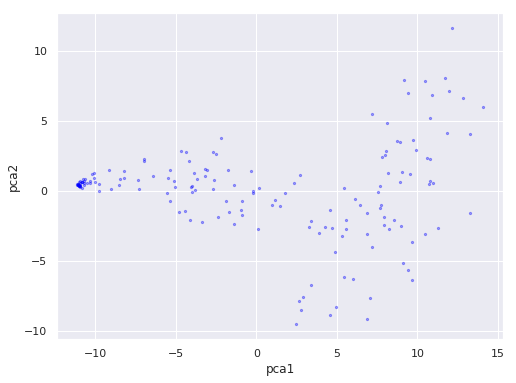

In [0]:
def var_scatter(df):
    ax=None
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))
    df.plot.scatter(x="pca1" , y="pca2", alpha=0.35, s=5, ax=ax, c = "blue")

    return ax

var_scatter(pcatdmNameClsDf);

In [0]:
clustering_kmeans = KMeans(n_clusters=4, precompute_distances="auto", n_jobs=-1)
pcatdmNameClsDf['clusters'] = clustering_kmeans.fit_predict(pcatdmNameClsDf)

In [0]:
pcatdmNameClsDf.head()

,pca1,pca2,clusters
0,2.443435,-9.518680,1
1,2.774518,-8.497408,1
2,2.680716,-7.846018,1
3,2.930697,-7.546017,1
4,3.378195,-6.740938,1


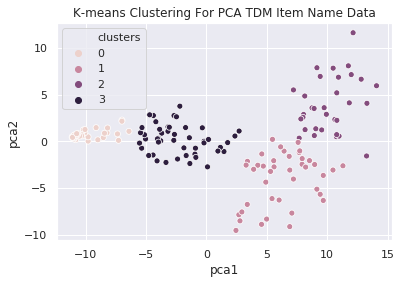

In [0]:
sns.scatterplot(x="pca1", y="pca2", hue=pcatdmNameClsDf['clusters'], data=pcatdmNameClsDf)
plt.title('K-means Clustering For PCA TDM Item Name Data')
plt.show()

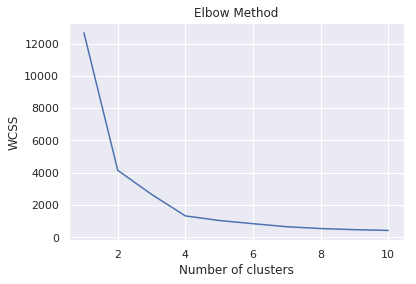

In [0]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pcatdmNameClsDf)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

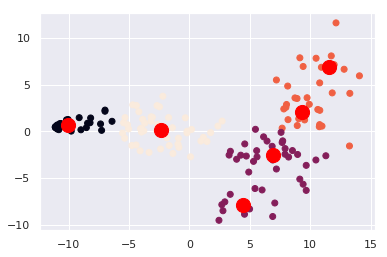

In [0]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(pcatdmNameClsDf)
plt.scatter(x="pca1", y="pca2", c=pcatdmNameClsDf['clusters'], data=pcatdmNameClsDf)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.show()

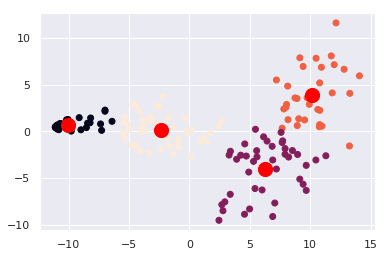

In [0]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(pcatdmNameClsDf)
plt.scatter(x="pca1", y="pca2", c=pcatdmNameClsDf['clusters'], data=pcatdmNameClsDf)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.show()

# **Cluster Analysis of TF-IDF Data of Item Name**




In [0]:
tfidfItemNameDF.head()

,alan,allview,amazon,amoi,apartment,apple,archos,asus,blackberry,blackview,bmc,boxer,bungalow,cabin,cannondale,chalet,condominium,cooler,cottage,crimson,felt,fuji,google,jamis,keychain,lg,marin,merida,microsoft,nec,newfoundland,ochre,periwinkle,pillows,pomeranian,poodle,samsung,sony,tan,tiny,townhome,trek,ultramarine,wnd
0,0.0,0.000000,0.000000,0.000000,0.0,0.907779,0.089246,0.000000,0.020592,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.247658,0.0,0.000000,0.126928,0.0,0.0,0.046194,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.187986,0.0,0.0,0.0,0.000000,0.0,0.0,0.229413
1,0.0,0.018997,0.000000,0.000000,0.0,0.955045,0.072891,0.000000,0.050455,0.0,0.022772,0.0,0.0,0.000000,0.017382,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.113777,0.0,0.000000,0.074048,0.0,0.0,0.046194,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.063973,0.0,0.0,0.0,0.000000,0.0,0.0,0.237335
2,0.0,0.018739,0.000000,0.000000,0.0,0.929705,0.072891,0.000000,0.050455,0.0,0.022772,0.0,0.0,0.000000,0.017147,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.124706,0.0,0.000000,0.116870,0.0,0.0,0.037217,0.030914,0.0,0.0,0.055619,0.0,0.0,0.0,0.113591,0.0,0.0,0.0,0.000000,0.0,0.0,0.295729
3,0.0,0.018739,0.020196,0.046713,0.0,0.968223,0.045291,0.000000,0.013934,0.0,0.022772,0.0,0.0,0.038837,0.017147,0.0,0.0,0.0,0.0,0.0,0.0,0.027779,0.104736,0.0,0.000000,0.012269,0.0,0.0,0.037217,0.012982,0.0,0.0,0.055619,0.0,0.0,0.0,0.095401,0.0,0.0,0.0,0.018413,0.0,0.0,0.186279
4,0.0,0.015454,0.020196,0.046713,0.0,0.940474,0.045291,0.043241,0.013681,0.0,0.022772,0.0,0.0,0.038837,0.017147,0.0,0.0,0.0,0.0,0.0,0.0,0.027779,0.092556,0.0,0.028552,0.132520,0.0,0.0,0.037217,0.012747,0.0,0.0,0.055619,0.0,0.0,0.0,0.104082,0.0,0.0,0.0,0.018413,0.0,0.0,0.274360


In [0]:
from sklearn.preprocessing import StandardScaler
sctfidfDFIName = StandardScaler().fit_transform(tfidfItemNameDF)
sctfidfDFIName

array([[-0.72098099, -0.94058803, -1.05148112, ..., -0.80837203,
        -1.92569748, -1.91505174],
       [-0.72098099, -0.75331522, -1.05148112, ..., -0.80837203,
        -1.92569748, -1.86208593],
       [-0.72098099, -0.7558533 , -1.05148112, ..., -0.80837203,
        -1.92569748, -1.47168503],
       ...,
       [ 2.99053393,  1.8813327 ,  1.63443506, ...,  1.23705417,
         0.06057041,  0.37236693],
       [ 2.99053393,  1.8813327 ,  1.63443506, ...,  1.23705417,
         0.06057041,  3.2368433 ],
       [ 2.99053393,  1.8813327 ,  1.63443506, ...,  1.23705417,
         0.06057041,  3.2368433 ]])

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(sctfidfDFIName)
pcatfidfDFIName = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])

In [0]:
pcatfidfDFIName.head()

,pca1,pca2
0,-7.860761,12.988825
1,-7.988570,13.061361
2,-7.877560,10.937586
3,-7.272608,6.988763
4,-6.917451,3.960272


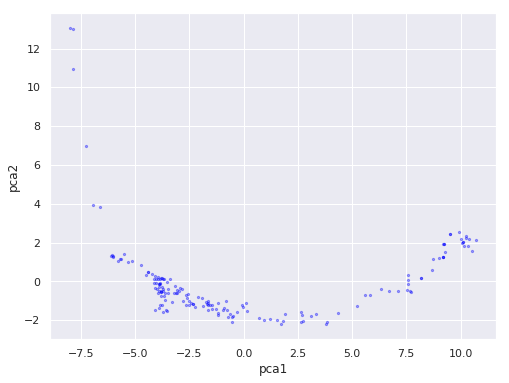

In [0]:
def var_scatter(df):
    ax=None
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))
    df.plot.scatter(x="pca1" , y="pca2", alpha=0.35, s=5, ax=ax, c = "blue")

    return ax

var_scatter(pcatfidfDFIName);

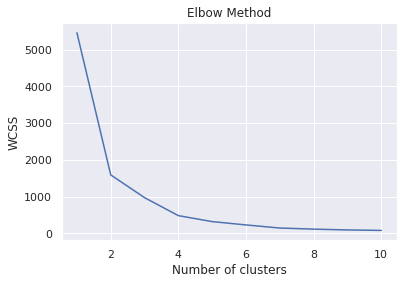

In [0]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pcatfidfDFIName)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
clustering_kmeans = KMeans(n_clusters=4, precompute_distances="auto", n_jobs=-1)
pcatfidfDFIName['clusters'] = clustering_kmeans.fit_predict(pcatfidfDFIName)

In [0]:
pcatfidfDFIName.head()

,pca1,pca2,clusters
0,-7.860761,12.988825,3
1,-7.988570,13.061361,3
2,-7.877560,10.937586,3
3,-7.272608,6.988763,3
4,-6.917451,3.960272,2


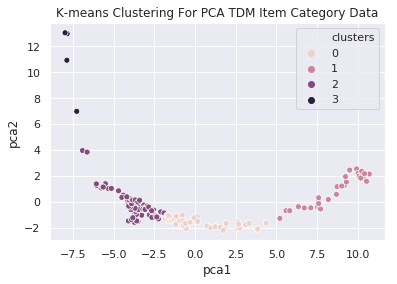

In [0]:
sns.scatterplot(x="pca1", y="pca2", hue=pcatfidfDFIName['clusters'], data=pcatfidfDFIName)
plt.title('K-means Clustering For PCA TDM Item Category Data')
plt.show()

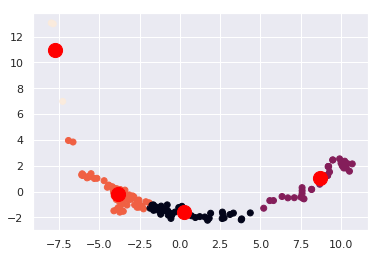

In [0]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(pcatfidfDFIName)
plt.scatter(x="pca1", y="pca2", c=pcatfidfDFIName['clusters'], data=pcatfidfDFIName)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.show()

# **Cluster Analysis of TF-IDF Data of Item Category**

In [0]:
tfidfItemCategoryDF.head()

,accessories,automobile,bicycle,color,dogs,homes,phones
0,0.142228,0.815227,0.000000,0.042723,0.006536,0.005570,0.559711
1,0.097209,0.846469,0.010647,0.016268,0.006536,0.009898,0.523035
2,0.140244,0.802851,0.005486,0.027941,0.006536,0.009898,0.578749
3,0.116105,0.778537,0.005529,0.050689,0.006536,0.015420,0.614461
4,0.155725,0.769871,0.005529,0.030660,0.005473,0.004664,0.618107


In [0]:
from sklearn.preprocessing import StandardScaler
sctfidfDFCat = StandardScaler().fit_transform(tfidfItemCategoryDF)
sctfidfDFCat

array([[-0.44391369,  0.84315921, -0.62621366, ..., -0.46479111,
        -0.66664896, -0.83433231],
       [-0.71549092,  1.23378195, -0.55076864, ..., -0.46479111,
        -0.62803925, -1.32687142],
       [-0.45588485,  0.68841754, -0.58734056, ..., -0.46479111,
        -0.62803925, -0.57866598],
       ...,
       [ 2.49164072, -2.49999237,  1.69237498, ...,  3.13101299,
         2.68023602,  2.88378349],
       [ 2.49164072, -0.58800362,  1.69237498, ...,  3.13101299,
         2.68023602,  1.22948495],
       [ 2.49164072, -5.32355337,  1.69237498, ...,  6.25761164,
         2.68023602, -3.94837439]])

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(sctfidfDFCat)
pcatfidfCatDf = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])

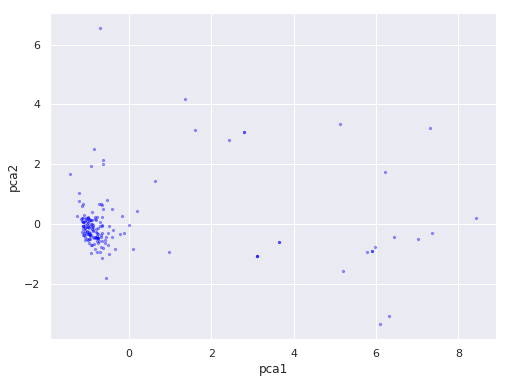

In [0]:
def var_scatter(df):
    ax=None
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))
    df.plot.scatter(x="pca1" , y="pca2", alpha=0.35, s=5, ax=ax, c = "blue")

    return ax

var_scatter(pcatfidfCatDf);

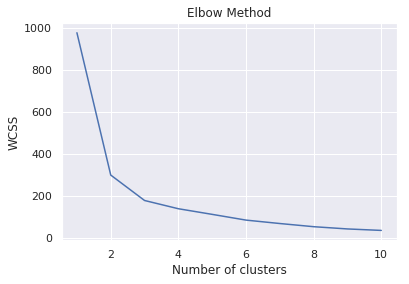

In [0]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pcatfidfCatDf)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
clustering_kmeans = KMeans(n_clusters=6, precompute_distances="auto", n_jobs=-1)
pcatfidfCatDf['clusters'] = clustering_kmeans.fit_predict(pcatfidfCatDf)

In [0]:
pcatfidfCatDf.head()

,pca1,pca2,clusters
0,-1.214975,1.039760,3
1,-1.426814,1.674853,3
2,-1.218372,0.750412,3
3,-1.144258,0.214290,3
4,-1.136221,0.085015,3


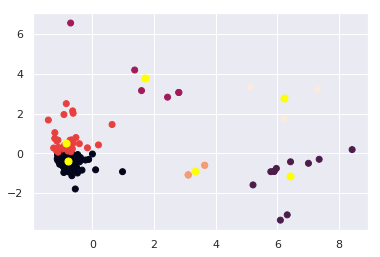

In [0]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(pcatfidfCatDf)
plt.scatter(x="pca1", y="pca2", c=pcatfidfCatDf['clusters'], data=pcatfidfCatDf)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='yellow')
plt.show()

# **Hierarchical Clustering Analysis**

> **TFIDF Item Category Data**



In [0]:
sctfidfDFCat = StandardScaler().fit_transform(tfidfItemCategoryDF)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(sctfidfDFCat)
pcatfidfCatDf = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])

In [0]:
pcatfidfCatDf.head()

,pca1,pca2
0,-1.214975,1.039760
1,-1.426814,1.674853
2,-1.218372,0.750412
3,-1.144258,0.214290
4,-1.136221,0.085015


In [0]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(pcatfidfCatDf)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

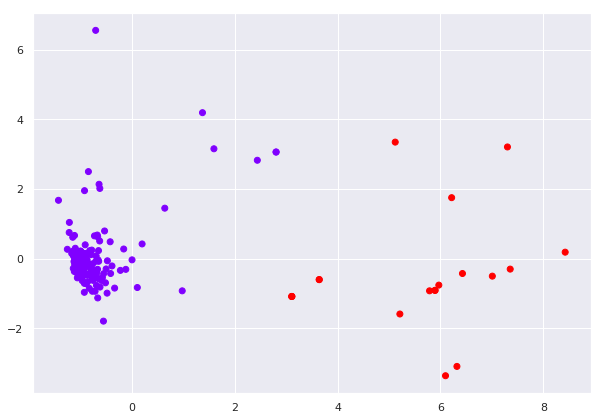

In [0]:
plt.figure(figsize=(10, 7))
plt.scatter(pcatfidfCatDf['pca1'], pcatfidfCatDf['pca2'], c=cluster.labels_, cmap='rainbow')

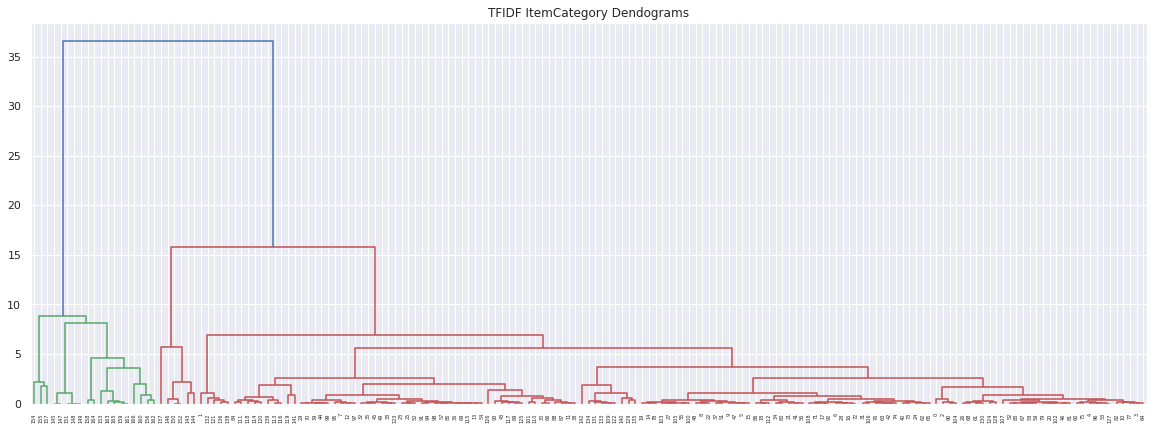

In [0]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 7))
plt.title("TFIDF ItemCategory Dendrograms")
dend = shc.dendrogram(shc.linkage(pcatfidfCatDf, method='ward'))

In [0]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(pcatfidfCatDf)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 1,
       3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1])

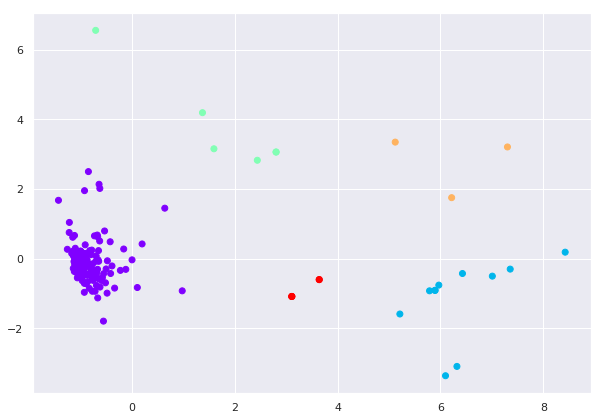

In [0]:
plt.figure(figsize=(10, 7))
plt.scatter(pcatfidfCatDf['pca1'], pcatfidfCatDf['pca2'], c=cluster.labels_, cmap='rainbow')

## TFIDF Item Name Data



In [0]:
sctfidfDFName = StandardScaler().fit_transform(tfidfItemNameDF)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(sctfidfDFName)
pcatfidfNameDf = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])

In [0]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(pcatfidfNameDf)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

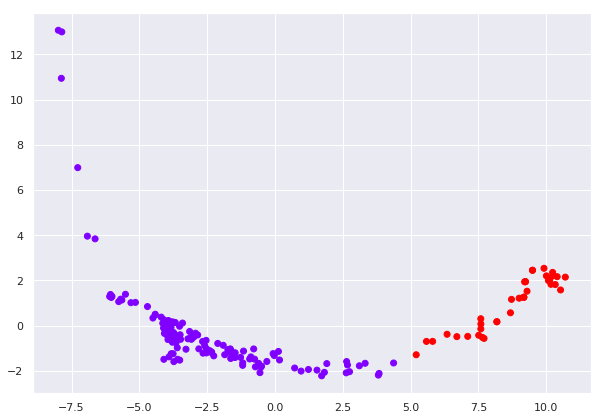

In [0]:
plt.figure(figsize=(10, 7))
plt.scatter(pcatfidfNameDf['pca1'], pcatfidfNameDf['pca2'], c=cluster.labels_, cmap='rainbow')

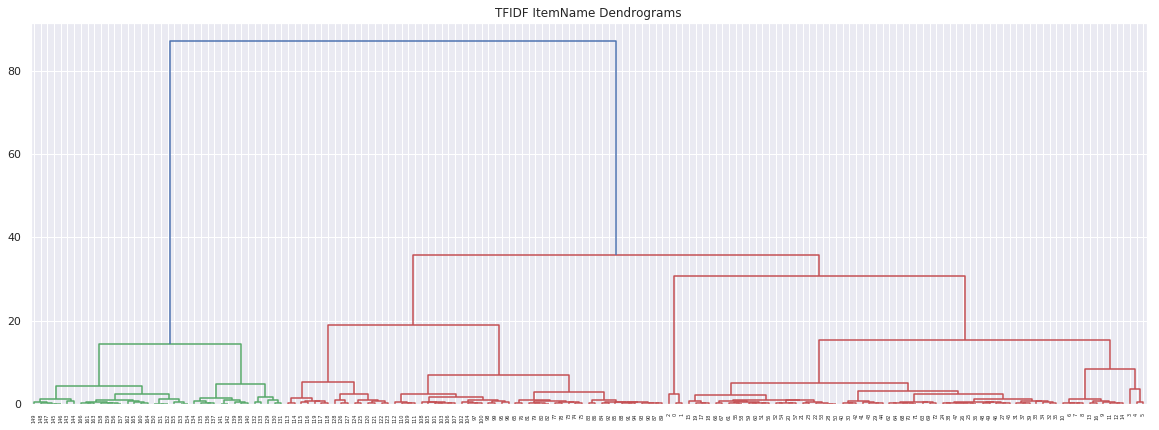

In [0]:
plt.figure(figsize=(20, 7))
plt.title("TFIDF ItemName Dendrograms")
dend = shc.dendrogram(shc.linkage(pcatfidfNameDf, method='ward'))

In [0]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(pcatfidfNameDf)

array([3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

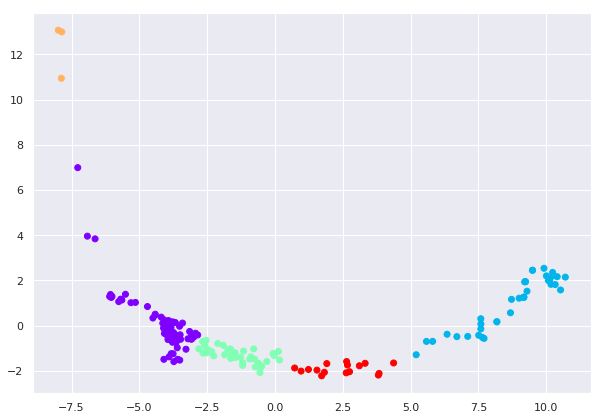

In [0]:
plt.figure(figsize=(10, 7))
plt.scatter(pcatfidfNameDf['pca1'], pcatfidfNameDf['pca2'], c=cluster.labels_, cmap='rainbow')